### Variables

**Age**: Edad de la paciente

**Race**: Raza de la paciente

**Marital Status**: Estado civil de la paciente

**T status**: Tamaño o extensión del tumor

**N Stage**: Número o Ubicación de los ganglios comprometidos

**6tth Stage**: 

**Differentiate**: Muestra qué tan desarrolladas están las células del cáncer

**Grade**: Grado determinado del cáncer

**A Stage**: Estado de la diseminación de la enfermedad (Regional)

**Tumor Size**: Tamaño del tumor (mm)

**Estrogen Status**: Estado de la progesterona

**Progesterone Status**: Estado de la progesterona

**Reginol Node Examined**: Ganglios examinados

**Survival Months**: Meses de supervivencia

**State**: Estado actual de la paciente (Sobreviviente o no sobreviviente)

## Inicio del Caso

In [19]:
#TRATAMIENTO DE DATOS
import pandas as pd
import numpy as np
#GRÁFICOS
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans', 'DejaVuSerif', 'OpenSans-Italic']
# import matplotlib.font_manager
# print(matplotlib.font_manager.findSystemFonts(fontpaths=[ '/usr/share/fonts/Open_Sans/static/'], fontext='ttf'))
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px
#PREPARACIÓN DE DATOS
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split
#MODELADO
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
#EVALUACIÓN
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#ADVERTENCIAS
import warnings
warnings.filterwarnings('ignore')

In [20]:
np.random.seed(12)

In [21]:
datos = pd.read_csv('data/datos_medicina.csv')
#datos = pd.read_csv('https://raw.githubusercontent.com/SGiraldoZ/NBs_cientifica/main/data/datos_medicina.csv')
datos

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately differentiated     2  Regional          63        Positive   
3         Poorly differentiated     3  Regional          18        Positive   
4         Poorly differentiated     3  Regional          41        Positive   
...                         ...   ...       ...         ...             ...   
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0               Positive                      24                      1   
1               Positive                      14                      5   
2               Positive                      14                      7   
3               Positive                       2                      1   
4               Positive                       3                      1   
...                  ...                     ...                    ...   
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
0                  60  Alive  
1                  62  Alive  
2                  75  Alive  
3                  84  Alive  
4                  50  Alive  
...               ...    ...  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive  

[4024 rows x 16 columns]

# Exploración de Datos

In [22]:
#Identificar cantidad de nulos y tipologías
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [23]:
#Exploración Univariada de datos
datos.describe()

## Por rangos similares se define que no es necesario normalizar. Escalar siempre es recomendable

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000

In [24]:
datos.describe(include='object')

Race Marital Status T Stage  N Stage 6th Stage  \
count    4024           4024     4024    4024      4024   
unique      3              5        4       3         5   
top     White        Married       T2      N1       IIA   
freq     3413           2643     1786    2732      1305   

                    differentiate Grade   A Stage Estrogen Status  \
count                        4024  4024      4024            4024   
unique                          4     4         2               2   
top     Moderately differentiated     2  Regional        Positive   
freq                         2351  2351      3932            3755   

       Progesterone Status Status  
count                 4024   4024  
unique                   2      2  
top               Positive  Alive  
freq                  3326   3408

### Analisis de distribuciones

<Axes: xlabel='Age', ylabel='Count'>

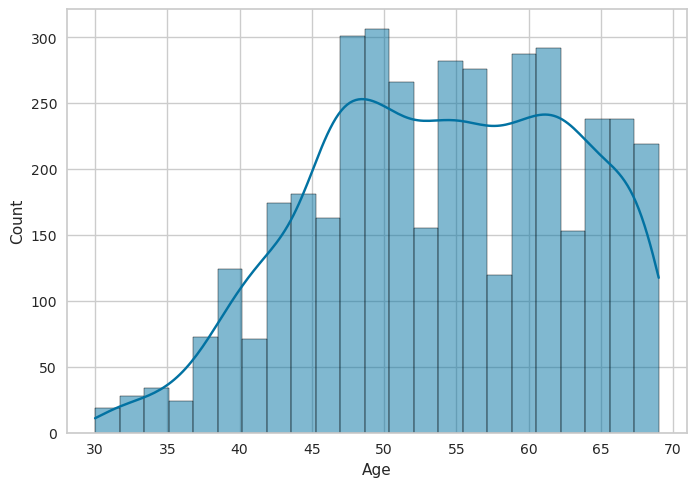

In [25]:
sb.histplot(data = datos, x= 'Age', kde=True)

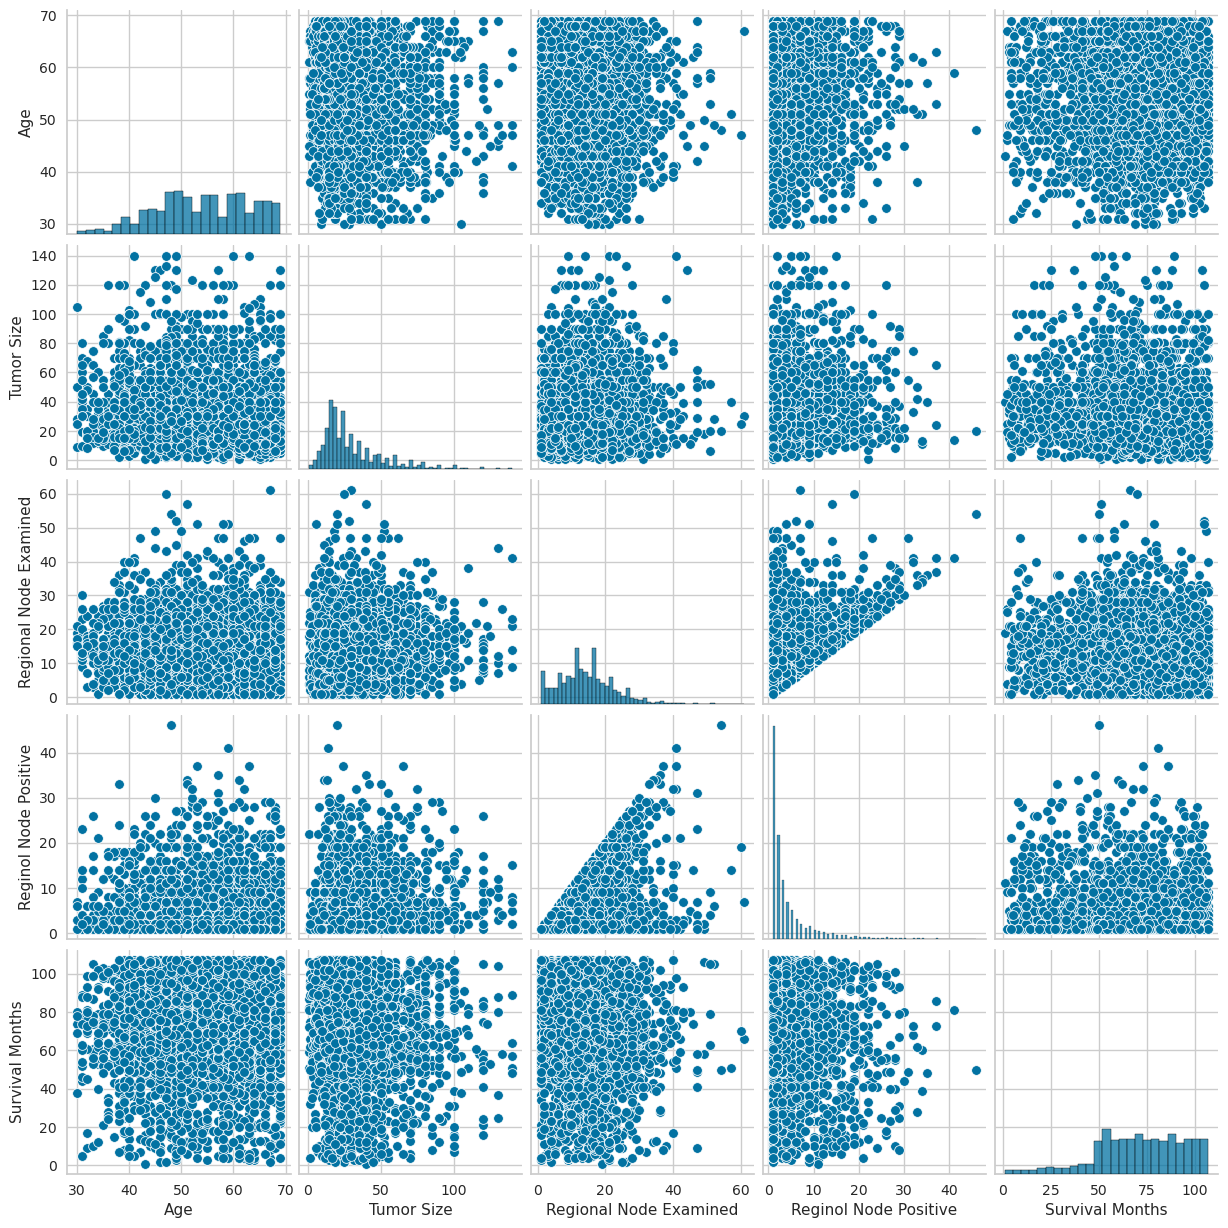

In [26]:
sb.pairplot(data=datos)

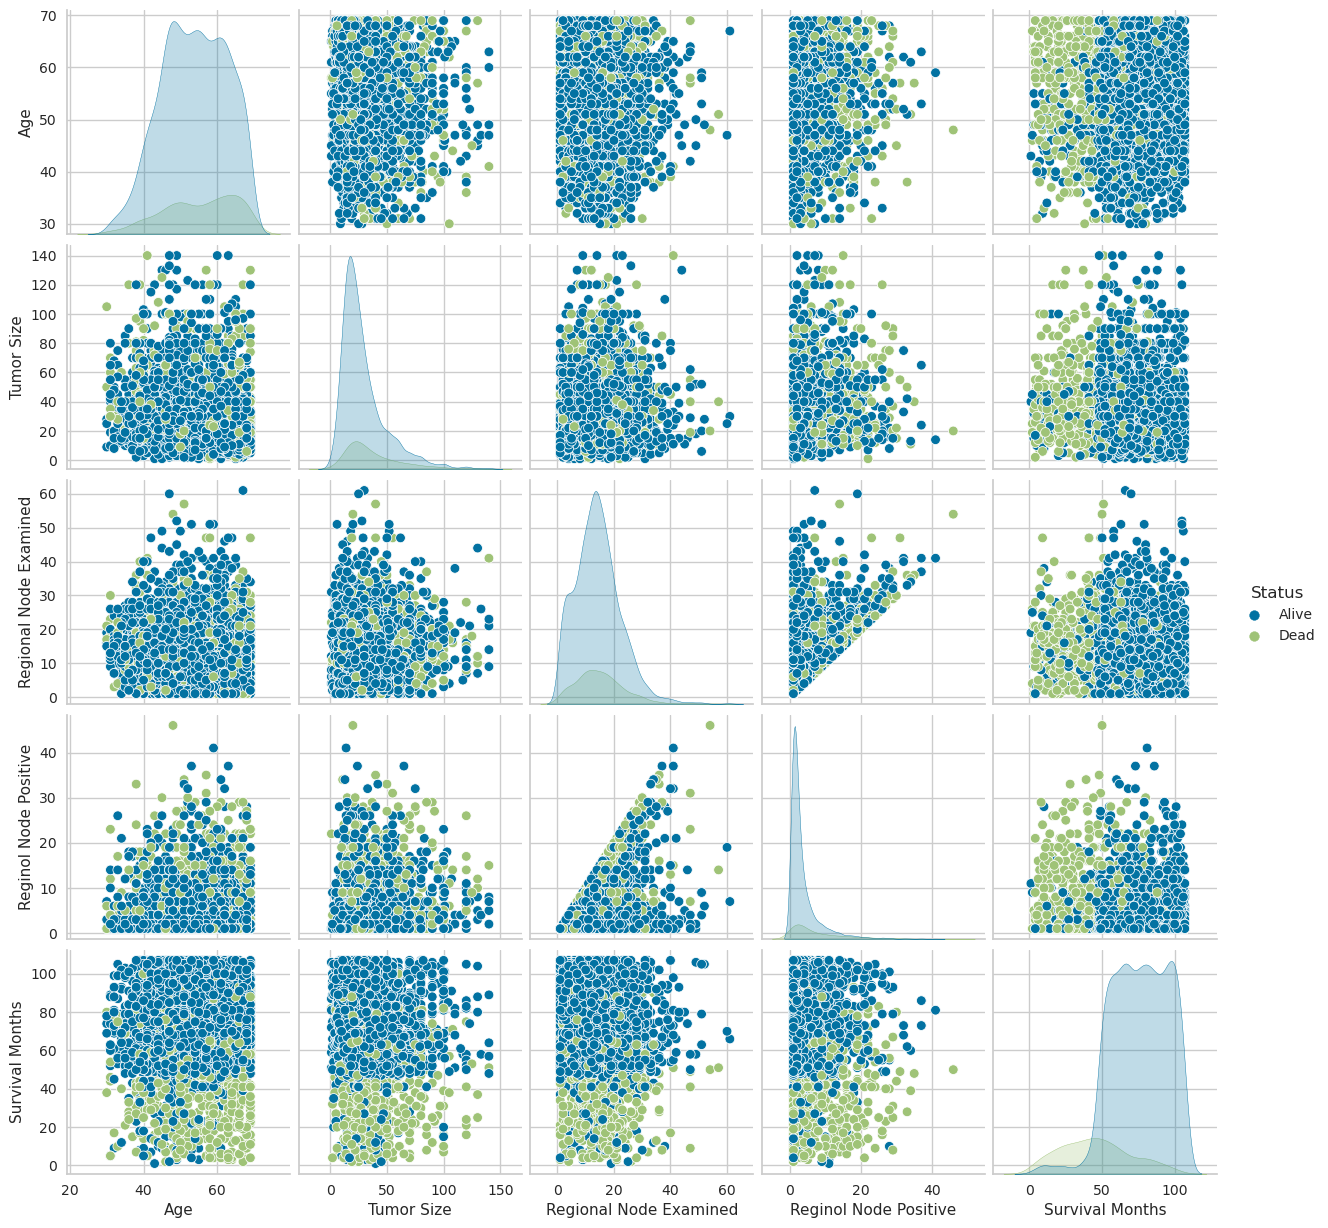

In [27]:
sb.pairplot(data=datos, hue='Status')

### Análisis de Variables Categóricas

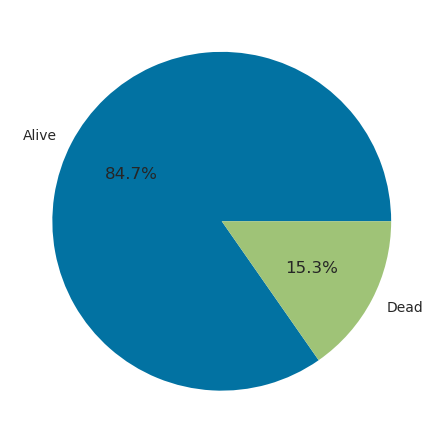

In [28]:
plt.pie(x=datos['Status'].value_counts(), labels= datos['Status'].value_counts().index, autopct='%0.1f%%')
plt.show()

>>#### Posibilidades para acercar entre sí los tamaños de la muestra y evitar biases en el modelo:
>
> - **Sample:** sacar una muestra del grupo más grande para quedar con dos categorías con el mismo número de individuos
>
> - **OverSample:** Tomar elementos de la categoría con pocos individuos, para generar una muestra mayor que sea del mismo tamaño que las otras categorías

([<matplotlib.patches.Wedge at 0x7f65f985d710>,
 [Text(-0.5202397352449826, 0.969201020362768, 'Married'),
  Text(-0.11572145243149949, -1.0938960395975226, 'Single '),
  Text(0.7531520732986899, -0.8017243631609838, 'Divorced'),
  Text(1.064780608017541, -0.2761200043274586, 'Widowed'),
  Text(1.0993212248029012, -0.0386373484836829, 'Separated')],
 [Text(-0.283767128315445, 0.5286551020160553, '65.7%'),
  Text(-0.06312079223536335, -0.596670567053194, '15.3%'),
  Text(0.4108102217992854, -0.4373041980878093, '12.1%'),
  Text(0.5807894225550223, -0.15061091145134103, '5.8%'),
  Text(0.5996297589834005, -0.021074917354736128, '1.1%')])

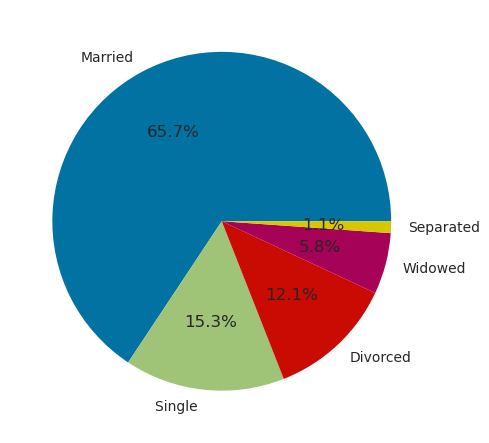

In [29]:
plt.pie(x=datos["Marital Status"].value_counts(), labels = datos['Marital Status'].value_counts().index, autopct='%0.1f%%')

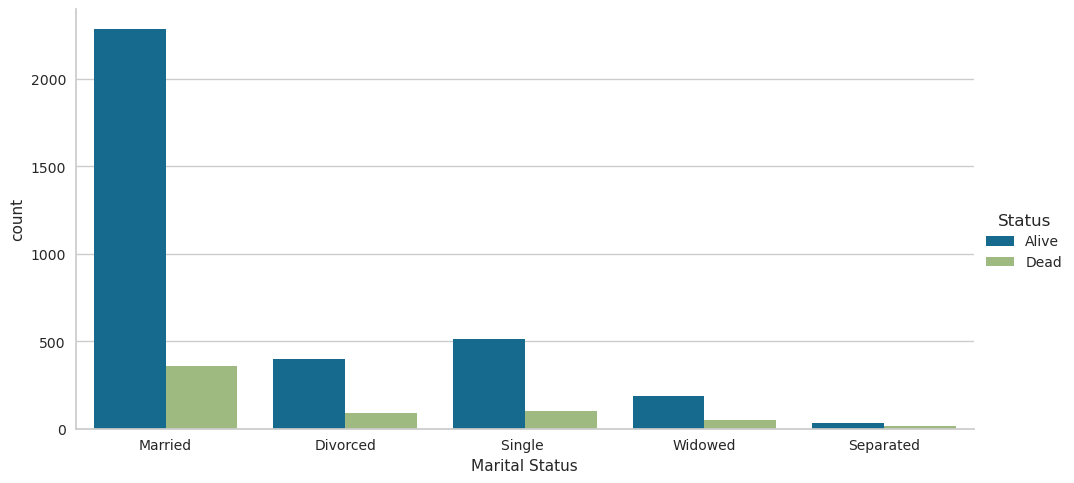

In [30]:
sb.catplot(data = datos, x = 'Marital Status', hue='Status', kind='count', aspect=2)
plt.show()

([<matplotlib.patches.Wedge at 0x7f65f96c3110>,
 [Text(-1.0971638022110561, 0.07894042765135273, 'Regional'),
  Text(1.0971637952820494, -0.07894052395499805, 'Distant')],
 [Text(-0.5984529830242123, 0.043058415082556034, '97.7%'),
  Text(0.5984529792447542, -0.043058467611817114, '2.3%')])

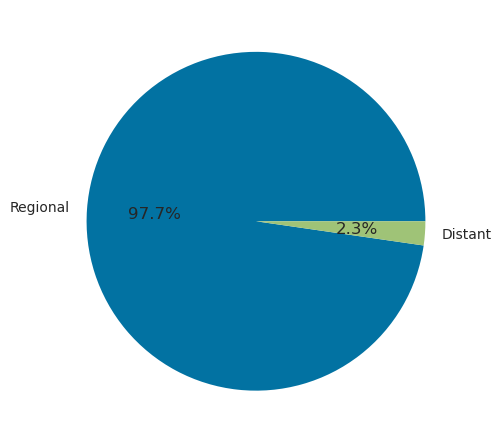

In [31]:
plt.pie(x=datos['A Stage'].value_counts(), labels=datos['A Stage'].value_counts().index, autopct="%0.1f%%")

### Preparación de Datos

In [32]:
datos.drop(['A Stage','Progesterone Status', 'Estrogen Status'], axis=1, inplace=True)
datos.head()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade  Tumor Size  Regional Node Examined  \
0      Poorly differentiated     3           4                      24   
1  Moderately differentiated     2          35                      14   
2  Moderately differentiated     2          63                      14   
3      Poorly differentiated     3          18                       2   
4      Poorly differentiated     3          41                       3   

   Reginol Node Positive  Survival Months Status  
0                      1               60  Alive  
1                      5               62  Alive  
2                      7               75  Alive  
3                      1               84  Alive  
4                      1               50  Alive

In [33]:
datos_alive = datos[datos['Status']=='Alive']
datos

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade  Tumor Size  Regional Node Examined  \
0         Poorly differentiated     3           4                      24   
1     Moderately differentiated     2          35                      14   
2     Moderately differentiated     2          63                      14   
3         Poorly differentiated     3          18                       2   
4         Poorly differentiated     3          41                       3   
...                         ...   ...         ...                     ...   
4019  Moderately differentiated     2           9                       1   
4020  Moderately differentiated     2          46                      14   
4021  Moderately differentiated     2          22                      11   
4022  Moderately differentiated     2          44                      11   
4023  Moderately differentiated     2          30                       7   

      Reginol Node Positive  Survival Months Status  
0                         1               60  Alive  
1                         5               62  Alive  
2                         7               75  Alive  
3                         1               84  Alive  
4                         1               50  Alive  
...                     ...              ...    ...  
4019                      1               49  Alive  
4020                      8               69  Alive  
4021                      3               69  Alive  
4022                      1               72  Alive  
4023                      2              100  Alive  

[4024 rows x 13 columns]

In [34]:
datos_dead = datos[datos['Status'] == 'Dead']
datos_dead

Age   Race Marital Status T Stage  N Stage 6th Stage  \
7      40  White        Married       T2      N1       IIB   
10     68  White        Widowed       T1      N1       IIA   
40     57  White        Single        T3      N3      IIIC   
46     42  White        Married       T1      N3      IIIC   
64     67  White       Divorced       T1      N1       IIA   
...   ...    ...            ...      ...     ...       ...   
3996   69  White        Married       T1      N2      IIIA   
4003   66  White       Divorced       T1      N2      IIIA   
4004   58  White        Married       T2      N2      IIIA   
4010   59  Black        Single        T2      N1       IIB   
4017   46  White        Married       T2      N1       IIB   

                  differentiate Grade  Tumor Size  Regional Node Examined  \
7     Moderately differentiated     2          30                       9   
10    Moderately differentiated     2          13                       9   
40    Moderately differentiated     2          70                      12   
46    Moderately differentiated     2           9                      15   
64    Moderately differentiated     2          13                      16   
...                         ...   ...         ...                     ...   
3996  Moderately differentiated     2          19                      21   
4003  Moderately differentiated     2          19                      21   
4004  Moderately differentiated     2          24                      19   
4010      Poorly differentiated     3          23                       6   
4017  Moderately differentiated     2          28                       2   

      Reginol Node Positive  Survival Months Status  
7                         1               14   Dead  
10                        1               64   Dead  
40                       12               42   Dead  
46                        2               39   Dead  
64                        3               60   Dead  
...                     ...              ...    ...  
3996                      9               88   Dead  
4003                      7               64   Dead  
4004                      9               65   Dead  
4010                      1               27   Dead  
4017                      1               19   Dead  

[616 rows x 13 columns]

In [36]:
#Submuestreo
datos_Alive_sub = datos_alive.sample(datos_dead.shape[0], replace = True)
datos_Alive_sub

Age   Race Marital Status T Stage  N Stage 6th Stage  \
3929   68  White        Married       T1      N2      IIIA   
1026   58  White        Married       T2      N1       IIB   
3692   45  White        Single        T2      N1       IIB   
3134   43  White        Single        T2      N1       IIB   
496    57  White        Married       T1      N1       IIA   
...   ...    ...            ...      ...     ...       ...   
1350   59  White        Married       T1      N1       IIA   
3150   48  Black        Single        T2      N1       IIB   
1791   61  Other        Married       T2      N1       IIB   
241    52  White        Married       T2      N1       IIB   
2888   52  White        Married       T1      N1       IIA   

                  differentiate Grade  Tumor Size  Regional Node Examined  \
3929      Poorly differentiated     3          17                      12   
1026  Moderately differentiated     2          32                      20   
3692  Moderately differentiated     2          26                       8   
3134      Poorly differentiated     3          30                      15   
496   Moderately differentiated     2          17                      23   
...                         ...   ...         ...                     ...   
1350  Moderately differentiated     2          20                      11   
3150  Moderately differentiated     2          25                      19   
1791  Moderately differentiated     2          25                       9   
241   Moderately differentiated     2          23                      30   
2888  Moderately differentiated     2          16                      17   

      Reginol Node Positive  Survival Months Status  
3929                      6               72  Alive  
1026                      2               89  Alive  
3692                      2               50  Alive  
3134                      1               80  Alive  
496                       1               87  Alive  
...                     ...              ...    ...  
1350                      2               99  Alive  
3150                      1               88  Alive  
1791                      3               83  Alive  
241                       2               99  Alive  
2888                      2               45  Alive  

[616 rows x 13 columns]

In [37]:
datos_sub = pd.concat([datos_Alive_sub, datos_dead])
datos_sub.shape

(1232, 13)

In [38]:
datos_sub = datos_sub.reset_index(drop=True)
datos_sub

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N2      IIIA   
1      58  White        Married       T2      N1       IIB   
2      45  White        Single        T2      N1       IIB   
3      43  White        Single        T2      N1       IIB   
4      57  White        Married       T1      N1       IIA   
...   ...    ...            ...      ...     ...       ...   
1227   69  White        Married       T1      N2      IIIA   
1228   66  White       Divorced       T1      N2      IIIA   
1229   58  White        Married       T2      N2      IIIA   
1230   59  Black        Single        T2      N1       IIB   
1231   46  White        Married       T2      N1       IIB   

                  differentiate Grade  Tumor Size  Regional Node Examined  \
0         Poorly differentiated     3          17                      12   
1     Moderately differentiated     2          32                      20   
2     Moderately differentiated     2          26                       8   
3         Poorly differentiated     3          30                      15   
4     Moderately differentiated     2          17                      23   
...                         ...   ...         ...                     ...   
1227  Moderately differentiated     2          19                      21   
1228  Moderately differentiated     2          19                      21   
1229  Moderately differentiated     2          24                      19   
1230      Poorly differentiated     3          23                       6   
1231  Moderately differentiated     2          28                       2   

      Reginol Node Positive  Survival Months Status  
0                         6               72  Alive  
1                         2               89  Alive  
2                         2               50  Alive  
3                         1               80  Alive  
4                         1               87  Alive  
...                     ...              ...    ...  
1227                      9               88   Dead  
1228                      7               64   Dead  
1229                      9               65   Dead  
1230                      1               27   Dead  
1231                      1               19   Dead  

[1232 rows x 13 columns]

In [40]:
datos_sub.describe()

Age   Tumor Size  Regional Node Examined  \
count  1232.000000  1232.000000             1232.000000   
mean     54.168831    33.443994               14.608766   
std       9.345559    22.667091                8.562259   
min      30.000000     1.000000                1.000000   
25%      47.000000    18.000000                9.000000   
50%      55.000000    25.000000               14.000000   
75%      62.000000    42.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            1232.000000      1232.000000  
mean                5.336851        60.427760  
std                 6.248003        26.190478  
min                 1.000000         2.000000  
25%                 1.000000        43.000000  
50%                 3.000000        61.000000  
75%                 7.000000        81.000000  
max                46.000000       107.000000

In [41]:
datos_sub.describe(include='object')

Race Marital Status T Stage  N Stage 6th Stage  \
count    1232           1232     1232    1232      1232   
unique      3              5        4       3         5   
top     White        Married       T2      N1      IIIA   
freq     1050            786      552     722       349   

                    differentiate Grade Status  
count                        1232  1232   1232  
unique                          4     4      2  
top     Moderately differentiated     2  Alive  
freq                          676   676    616

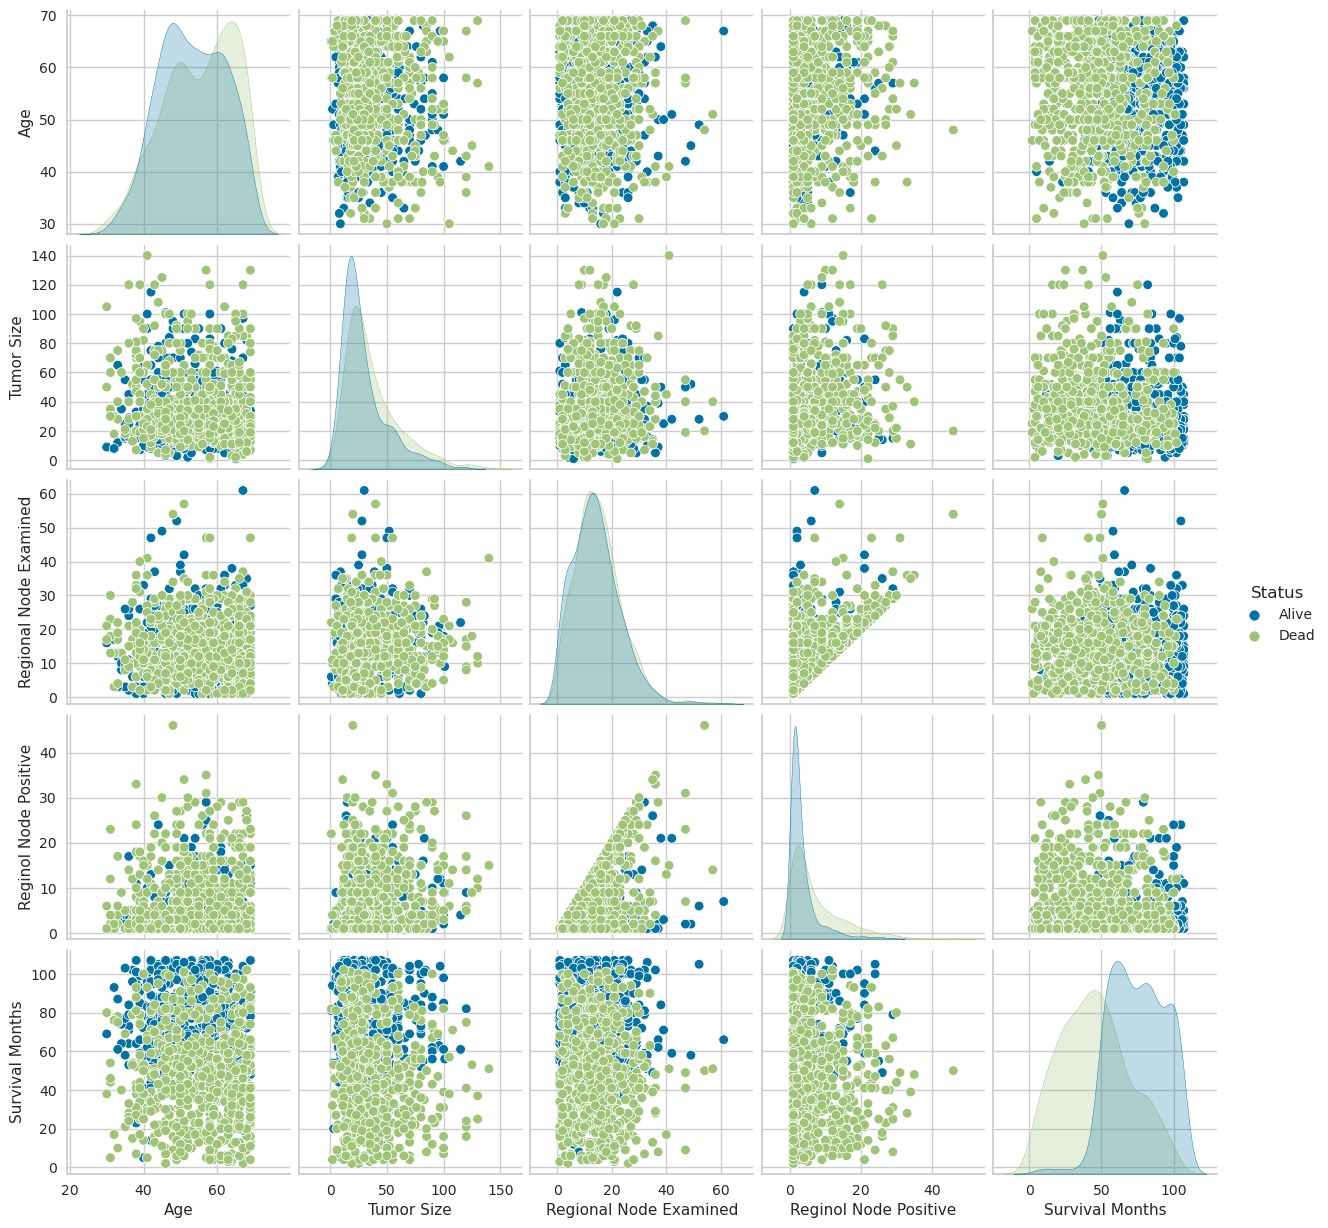

In [44]:
sb.pairplot(data=datos_sub, hue='Status')

In [50]:
#Remuestreo

datos_dead_re = datos_dead.sample(datos_alive.shape[0], replace=True)
datos_dead_re.shape

(3408, 13)

In [51]:
datos_re = pd.concat([datos_alive, datos_dead_re])
datos_re.shape

(6816, 13)

In [53]:
datos_re = datos_re.reset_index(drop=True)
datos_re.describe()

Age   Tumor Size  Regional Node Examined  \
count  6816.000000  6816.000000             6816.000000   
mean     54.507629    33.288292               14.736062   
std       9.291889    22.949345                8.464766   
min      30.000000     1.000000                1.000000   
25%      47.000000    18.000000                9.000000   
50%      55.000000    25.000000               14.000000   
75%      62.000000    42.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            6816.000000      6816.000000  
mean                5.410945        60.951585  
std                 6.276065        26.425149  
min                 1.000000         1.000000  
25%                 1.000000        43.000000  
50%                 3.000000        61.000000  
75%                 7.000000        82.000000  
max                46.000000       107.000000

In [55]:
datos.describe(include='object')

Race Marital Status T Stage  N Stage 6th Stage  \
count    4024           4024     4024    4024      4024   
unique      3              5        4       3         5   
top     White        Married       T2      N1       IIA   
freq     3413           2643     1786    2732      1305   

                    differentiate Grade Status  
count                        4024  4024   4024  
unique                          4     4      2  
top     Moderately differentiated     2  Alive  
freq                         2351  2351   3408

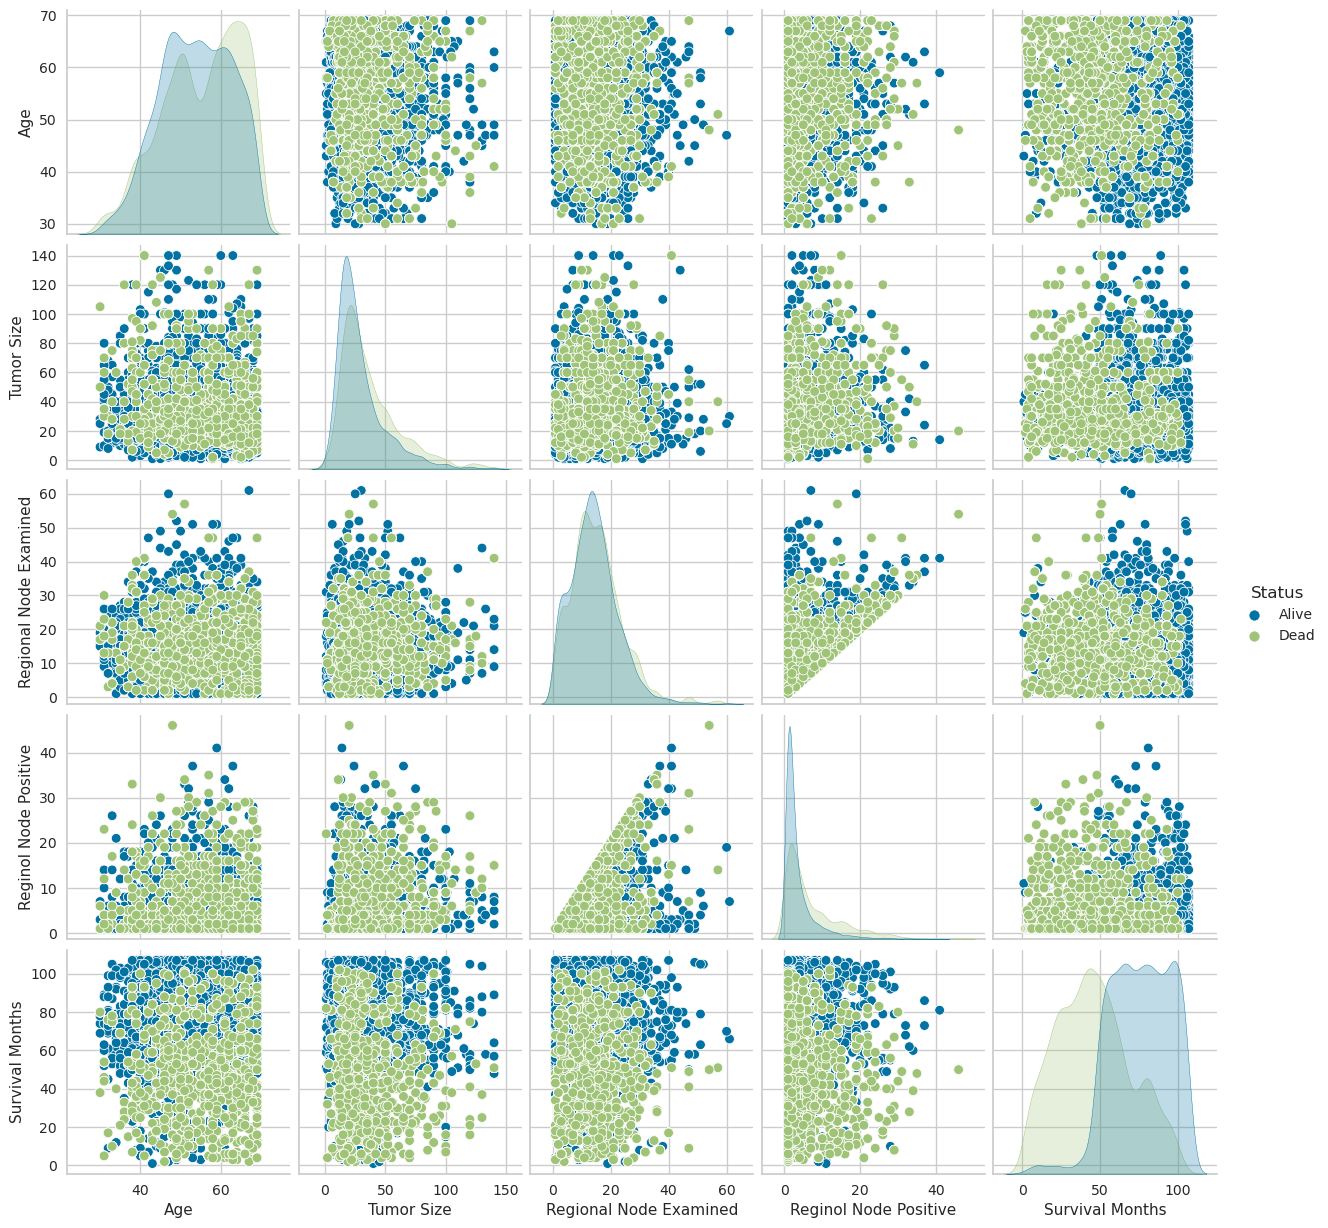

In [54]:
sb.pairplot(data=datos_re, hue='Status')

In [60]:
#Transformation pipeline

num_cols = datos_re.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = datos_re.drop('Status', axis=1).select_dtypes(include=['object']).columns.to_list()
y_cols = datos_re[['Status']].columns.to_list()

num_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
y_transformer = Pipeline(steps=[('Ordinal', OrdinalEncoder())])

preprocesador = ColumnTransformer(transformers = [
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols),
    ('ord', y_transformer, y_cols)
], remainder='passthrough')

set_config(display='diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Age', 'Tumor Size', 'Regional Node Examined',
                                  'Reginol Node Positive', 'Survival Months']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Race', 'Marital Status', 'T Stage ',
                                  'N Stage', '6th Stage', 'differentiate',
                                  'Grade']),
                                ('ord',
                                 Pipeline(steps=[('Ordinal',
                                                  OrdinalEncoder())]),
                                 ['Status'])])

In [63]:
datos_pre = preprocesador.fit_transform(datos_re)
cod_cat = preprocesador.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
labels = np.concatenate([num_cols, cod_cat, y_cols])
datos_pro = pd.DataFrame(datos_pre, columns = labels)
datos_pro

Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0     0.974359    0.021583                0.383333               0.000000   
1     0.512821    0.244604                0.216667               0.088889   
2     0.717949    0.446043                0.216667               0.133333   
3     0.717949    0.122302                0.016667               0.000000   
4     0.435897    0.287770                0.033333               0.000000   
...        ...         ...                     ...                    ...   
6811  0.435897    0.172662                0.250000               0.044444   
6812  0.487179    0.122302                0.083333               0.088889   
6813  0.948718    0.266187                0.016667               0.000000   
6814  0.897436    0.244604                0.233333               0.311111   
6815  0.717949    0.856115                0.116667               0.088889   

      Survival Months  Race_Black  Race_Other  Race_White  \
0            0.556604         0.0         0.0         1.0   
1            0.575472         0.0         0.0         1.0   
2            0.698113         0.0         0.0         1.0   
3            0.783019         0.0         0.0         1.0   
4            0.462264         0.0         0.0         1.0   
...               ...         ...         ...         ...   
6811         0.556604         1.0         0.0         0.0   
6812         0.490566         0.0         0.0         1.0   
6813         0.094340         0.0         0.0         1.0   
6814         0.556604         0.0         0.0         1.0   
6815         0.188679         0.0         0.0         1.0   

      Marital Status_Divorced  Marital Status_Married  ...  6th Stage_IIIC  \
0                         0.0                     1.0  ...             0.0   
1                         0.0                     1.0  ...             0.0   
2                         1.0                     0.0  ...             1.0   
3                         0.0                     1.0  ...             0.0   
4                         0.0                     1.0  ...             0.0   
...                       ...                     ...  ...             ...   
6811                      0.0                     0.0  ...             0.0   
6812                      0.0                     1.0  ...             0.0   
6813                      0.0                     0.0  ...             0.0   
6814                      1.0                     0.0  ...             1.0   
6815                      1.0                     0.0  ...             0.0   

      differentiate_Moderately differentiated  \
0                                         0.0   
1                                         1.0   
2                                         1.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
6811                                      0.0   
6812                                      1.0   
6813                                      0.0   
6814                                      1.0   
6815                                      0.0   

      differentiate_Poorly differentiated  differentiate_Undifferentiated  \
0                                     1.0                             0.0   
1                                     0.0                             0.0   
2                                     0.0                             0.0   
3                                     1.0                             0.0   
4                                     1.0                             0.0   
...                                   ...                             ...   
6811                                  1.0                             0.0   
6812                                  0.0                             0.0   
6813                                  1.0                             0.0   
6814                                  0.0                

## Fase De Entrenamiento

> Se separan los datos en x_entr, y_entr para entrenar. Y dos subgrupos para probar

[img]

In [66]:
# Separación de datos

x = datos_pro.drop('Status', axis = 1)
y = datos_pro['Status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)